In [86]:
from sklearn.datasets import make_classification
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn.preprocessing import StandardScaler

In [87]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
)

X = torch.from_numpy(X).type(dtype=torch.float32)

scaler = StandardScaler()
X = torch.from_numpy(scaler.fit_transform(X)).float()
y = torch.from_numpy(y).type(dtype=torch.float32)

In [88]:
print(X)

tensor([[-0.7194, -0.4570],
        [ 0.9801,  0.8382],
        [ 0.7652,  0.6285],
        ...,
        [-0.0400, -1.1171],
        [ 0.5238, -0.5402],
        [ 0.5652, -0.8957]])


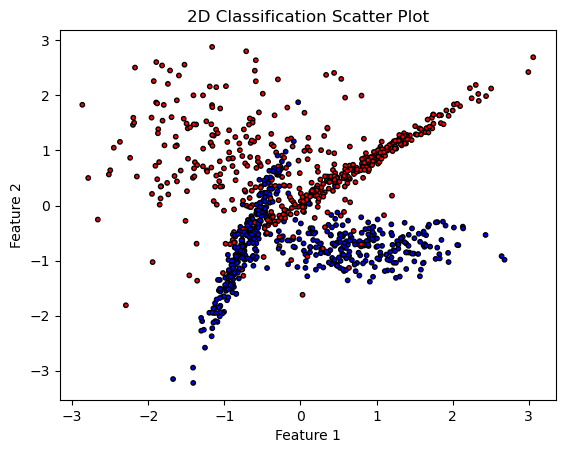

In [89]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Classification Scatter Plot")
plt.show()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


class Classification_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=2, out_features=12),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=12, out_features=24),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=24, out_features=1),
            nn.Sigmoid(),
        )

    def forward(self, X):
        return self.model(X)

In [91]:
torch.manual_seed(42)
model_10 = Classification_Model()

In [92]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model_10.parameters(),lr=0.01)

In [93]:
epochs = 1000
test_loss_values = []
train_loss_values = []
for epoch in range(epochs):
    model_10.train()
    y_preds = model_10(X_train).squeeze()
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_10.eval()
    with torch.inference_mode():
        y_test_preds = model_10(X_test).squeeze()
        test_loss = loss_fn(y_test_preds, y_test)
        y_test_pred_labels = (model_10(X_test).squeeze() > 0.5).float()
        accuracy = (y_test_pred_labels == y_test).float().mean()

        if epoch % 10 == 0:
            test_loss_values.append(test_loss)
            train_loss_values.append(loss)
            print("Test Accuracy:", accuracy.item())
            print(f"Epoch: {epoch}, Train_Loss: {loss}, Test_Loss: {test_loss} ")

Test Accuracy: 0.5049999952316284
Epoch: 0, Train_Loss: 0.702738344669342, Test_Loss: 0.6880611181259155 
Test Accuracy: 0.824999988079071
Epoch: 10, Train_Loss: 0.5857159495353699, Test_Loss: 0.5576298236846924 
Test Accuracy: 0.8550000190734863
Epoch: 20, Train_Loss: 0.4324289560317993, Test_Loss: 0.37104442715644836 
Test Accuracy: 0.8650000095367432
Epoch: 30, Train_Loss: 0.35730135440826416, Test_Loss: 0.28127944469451904 
Test Accuracy: 0.875
Epoch: 40, Train_Loss: 0.3220115900039673, Test_Loss: 0.2502554953098297 
Test Accuracy: 0.8949999809265137
Epoch: 50, Train_Loss: 0.31026333570480347, Test_Loss: 0.24302053451538086 
Test Accuracy: 0.8999999761581421
Epoch: 60, Train_Loss: 0.2974148988723755, Test_Loss: 0.23169177770614624 
Test Accuracy: 0.8999999761581421
Epoch: 70, Train_Loss: 0.2742213308811188, Test_Loss: 0.22130011022090912 
Test Accuracy: 0.8999999761581421
Epoch: 80, Train_Loss: 0.293656587600708, Test_Loss: 0.22038616240024567 
Test Accuracy: 0.9049999713897705
Epo

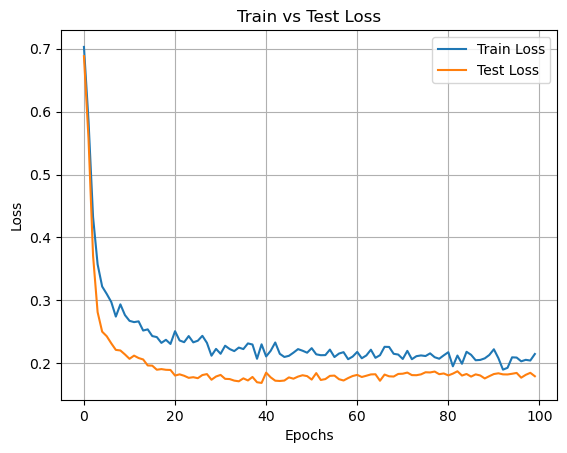

In [94]:
with torch.inference_mode():
    plt.plot(train_loss_values, label="Train Loss")
    plt.plot(test_loss_values, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.grid(True)
    plt.show()